<a href="https://colab.research.google.com/github/Frankl1sales/cnc_d/blob/main/Suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Bibliotecas



In [913]:
import numpy as np
import matplotlib.pyplot as plt
import math
import inspect

## Bissecção

In [914]:
tol = 1e-3  # precisão 0,001
max_iter = 10 # máximo de iterações

In [915]:
funcao_exemplo = lambda x: x**3 - 9*x + 3

In [916]:
def bissecao_precisao (funcao, a, b, tol):
  if funcao(a)*funcao(b) >= 0:
    print("A função deve ter sinais opostos em 'a' e 'b'.")
  iteracao = 0
  while (b - a)/2 > tol:
    c = (a + b)/2
    if funcao(c) == 0:
      return c # encontrada a raiz exata
    elif funcao(c)*funcao(a) < 0:
      b = c
    else:
          a = c
    iteracao += 1
  return (a + b)/2

In [917]:
def bissecao_iterativo(funcao, a, b, max_iter):
  if funcao(a)*funcao(b) >= 0:
    print("A função deve ter sinais opostos em 'a' e 'b'.")
  iteracao = 0
  while iteracao < max_iter:
    c = (a + b)/2
    if funcao(c) == 0:
      return c # encontrada a raiz exata
    elif funcao(c)*funcao(a) < 0:
      b = c
    else:
          a = c
    iteracao += 1
  return (a + b)/2

In [918]:
raiz = bissecao_precisao(funcao_exemplo, 0, 1, tol)
print("A raiz da função é aproximadamente [Metodo por Precisão]:", raiz)

raiz1 = bissecao_iterativo(funcao_exemplo, 0, 1, max_iter)
print("A raiz da função é aproximadamente [Metodo Iterativo]:", raiz1)

A raiz da função é aproximadamente [Metodo por Precisão]: 0.3369140625
A raiz da função é aproximadamente [Metodo Iterativo]: 0.33740234375


## Falsa Posição

In [919]:
tol1 = 5*1e-4
tol2 = 5*1e-4
max_iter1 = 100

In [920]:
funcao_exemplo1 = lambda x: x**3 - 9*x + 3

In [921]:
def falsaposicao_precisao (funcao, a, b, tol1, tol2):
# PASSO 1
  if funcao(a)*funcao(b) >= 0:
    print("A função deve ter sinais opostos em 'a' e 'b'.")
    return None

# PASSSO 2
  if (b - a) < tol1:
    print(" b-a < tol1")
    if abs(funcao(a)) < tol2:
      return a
    elif abs(funcao(b)) < tol2:
      return b
# PASSO 3
  iteracao1 = 0

  while (b - a) > tol1:
# PASSO 5
    # print("entrou no laço")
    x = (a * funcao(b) - b * funcao(a)) / (funcao(b) - funcao(a))
# PASSO 6
    # convergiu
    if abs(funcao(x)) < tol2:
      # print("f(x) < tol2")
      return x # encontrada a raiz exata
    elif funcao(a)*funcao(x) > 0:
      a = x
      if b-a < tol1:
        return x
    b = x
    iteracao1 += 1
  # não convergiu
  return None

In [922]:
def falsaposicao_iterativo(funcao, a, b, max_iter):
    iteracao = 0

    while iteracao < max_iter:
        x = (a * funcao(b) - b * funcao(a)) / (funcao(b) - funcao(a))

        if funcao(a) * funcao(x) > 0:
            a = x
        else:
            b = x

        iteracao += 1

    return x

In [923]:
raiz_fp_precisao = falsaposicao_precisao(funcao_exemplo1, 0, 1, tol1,tol2)
print("A raiz da função é aproximadamente [Metodo por Precisão]:", raiz_fp_precisao)

raiz_fp_iteracao = falsaposicao_iterativo(funcao_exemplo1, 0, 1, max_iter1)
print("A raiz da função é aproximadamente [Metodo Iterativo]:", raiz_fp_iteracao)

A raiz da função é aproximadamente [Metodo por Precisão]: 0.33763504551140067
A raiz da função é aproximadamente [Metodo Iterativo]: 0.33760895596583773


## Newton–Raphson

In [924]:
x0 = 0.5
tol = 1e-4
max_iter = 3

In [925]:
funcao_exemplo2 = lambda x: x**3 - 9*x + 3
derivada_exemplo = lambda x: 3*x**2-9

In [926]:
def newton_raphson_precisao(funcao, derivada, x0, tol):
    x_n = x0
    iteracao = 0

    while True:
        f_x_n = funcao(x_n)
        f_prime_x_n = derivada(x_n)

        #print(f"Iteração {iteracao}: x = {x_n}, f(x) = {f_x_n}, f'(x) = {f_prime_x_n}")

        # verifica se a função no ponto inicial já está dentro da tolerância
        if abs(f_x_n) < tol:
            #print(f"Convergiu após {iteracao+1} iterações.")
            return x_n

        # evita divisao por zero
        if f_prime_x_n == 0:
            print("Derivada zero. Não é possível continuar.")
            return None

        # calcula a proxima aproximacao
        x_n1 = x_n - f_x_n / f_prime_x_n

        # verifica a convergência
        if abs(funcao(x_n1)) < tol or abs(x_n1 - x_n) < tol:
            #print(f"Convergiu após {iteracao+1} iterações.")
            return x_n1

        # itera e atualiza o x_n
        x_n = x_n1
        iteracao += 1

In [927]:
def newton_raphson_iterativo(funcao, derivada, x0, max_iter):
    x_n = x0

    for n in range(max_iter):
        f_x_n = funcao(x_n)
        f_prime_x_n = derivada(x_n)

        if f_prime_x_n == 0:
            print("Derivada zero. Não é possível continuar.")
            return None

        x_n = x_n - f_x_n / f_prime_x_n

    return x_n


In [928]:

raiz_np_precisao = newton_raphson_precisao(funcao_exemplo2, derivada_exemplo, x0, tol)
print(f"A raiz encontrada é [Metodo por Precisão]: {raiz_np_precisao}")

raiz_np_iterativo = newton_raphson_iterativo(funcao_exemplo2, derivada_exemplo, x0, max_iter)
print(f"A raiz encontrada é [Metodo Iterativo]: {raiz_np_iterativo}")

A raiz encontrada é [Metodo por Precisão]: 0.33760683760683763
A raiz encontrada é [Metodo Iterativo]: 0.3376089559653128


## Secante

In [929]:
x0 = 0  # Estimativa inicial 1
x1 = 1  # Estimativa inicial 2
tol1 = 5*1e-4  # Tolerância
tol2 = 5*1e-4
max_iter = 3  # Número máximo de iterações

In [930]:
funcao_exemplo3 = lambda x: x**3 - 9*x + 3

In [931]:
def secante_precisao(funcao, x0, x1, tol1,tol2):
    iteracao = 0

    while True:
        f_x0 = funcao(x0)
        f_x1 = funcao(x1)

        # verifica se a função no ponto inicial já está dentro da tolerância
        if abs(f_x0) < tol1:
            #print(f"Convergiu após {iteracao+1} iterações.")
            return x0

        # verifica a função no x1
        if abs(f_x1) < tol1 or abs(x1 - x0) < tol2:
            #print(f"Convergiu após {iteracao+1} iterações.")
            return x1

        # Evitar divisão por zero
        if f_x1 == f_x0:
            print("Divisão por zero. Não é possível continuar.")
            return None

        # Fórmula da secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Verificar a convergência
        if abs(funcao(x2)) < tol1 or abs(x2 - x1) < tol2:
            #print(f"Convergiu após {iteracao+1} iterações.")
            return x2

        # Atualizar os valores
        x0, x1 = x1, x2
        iteracao += 1


In [932]:
def secante_iterativo(funcao, x0, x1, max_iter):
    for n in range(max_iter):
        f_x0 = funcao(x0)
        f_x1 = funcao(x1)

        # Evitar divisão por zero
        if f_x1 == f_x0:
            print("Divisão por zero. Não é possível continuar.")
            return None

        # Fórmula da secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Atualizar os valores
        x0, x1 = x1, x2

        #print(f"Iteração {n+1}: x = {x1}")

    #print("Número máximo de iterações atingido.")
    return x1

In [933]:
raiz_s_precisao = secante_precisao(funcao_exemplo3, x0, x1, tol1, tol2)
print(f"A raiz encontrada é [Metodo por Precisão]: {raiz_s_precisao}")

raiz_s_iterativo = secante_iterativo(funcao_exemplo3, x0, x1, max_iter)
print(f"A raiz encontrada é [Metodo Iterativo]: {raiz_s_iterativo}")

A raiz encontrada é [Metodo por Precisão]: 0.33763462072303707
A raiz encontrada é [Metodo Iterativo]: 0.33763462072303707


## Gráficos

In [934]:

f_x_1 = lambda x: x**3 - 9*x + 3

In [935]:
inicio = 0
fim = 1
nro_pts = 100
curva = np.linspace(inicio, fim, nro_pts)
values =  [f_x_1 (value) for value in curva]
raiz_g = bissecao_precisao(f_x_1, inicio, fim, tol)
print("A :", f_x_1(raiz_g))

roots = [raiz_g]

A : 0.00020352339993223723


In [936]:
# Função para extrair a expressão lambda como string
def lambda_to_string(lambda_func):
    lambda_str = inspect.getsource(lambda_func).strip()
    lambda_str = lambda_str[lambda_str.find('lambda'):]
    return lambda_str

In [937]:
def plot_function(f_x_1, lambda_to_string, raizes_grafico, inicio, fim, nro_pts):
    # Gere os pontos da curva
    curva = np.linspace(inicio, fim, nro_pts)

    # Calcule os valores da função nos pontos da curva
    values = [f_x_1(value) for value in curva]

    # Plote a curva
    plt.plot(curva, values, linestyle='dotted')

    # Adicione as raízes como pontos no gráfico
    for raiz in raizes_grafico:
        plt.plot(raiz, f_x_1(raiz), 'ro')  # Apenas plota o ponto vermelho
        print(f"f({raiz}): {f_x_1(raiz)}")
    # Converta a função lambda em string
    func_str = lambda_to_string(f_x_1)

    # Adicione linhas para os eixos x e y
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.2)

    # Defina os limites dos eixos
    plt.xlim(inicio, fim)
    plt.ylim(min(values), max(values))

    # Adicione rótulos e título
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Gráfico de f(x) = {func_str}')

    # Adicione a legenda
    plt.legend(['Função', 'Raízes Aprox'])

    # Adicione texto com o valor de f_x nas raízes
    for raiz in raizes_grafico:
        texto = f"f_x({raiz:.9f}) = {f_x_1(raiz):.6f}"
        plt.text(raiz, f_x_1(raiz), texto, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    plt.grid()

    # Mostre o gráfico
    plt.show()

f(0.33758544921875): 0.00020352339993223723


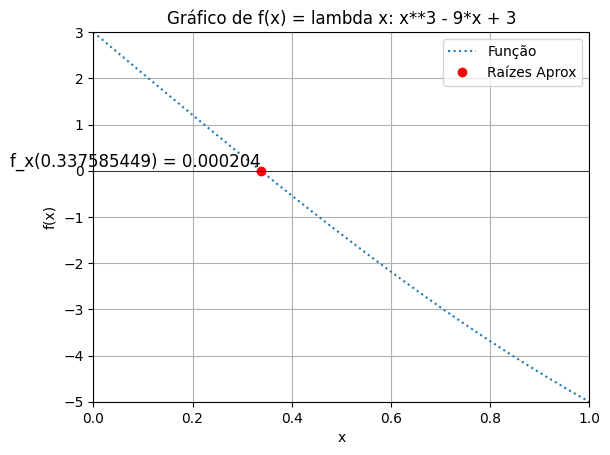

In [938]:
plot_function(f_x_1,lambda_to_string, roots, inicio, fim, nro_pts)

## Exercícios

### Exercício 1


```
1) A função f (x) = tgπ x - 6 tem um zero em (1/π) arctg 6 ≈ 0,447431543. Sejam x0
= 0 e x1 = 0,48. Utilize 10 interações de cada um dos métodos a seguir para encontrar a aproximação dessa raiz.
Qual é o método mais eficiente e por quê?
 a. Método da Bissecção
 b. Método da Falsa Posição
 c. Método da Secante
 d. Faça a comparação dos erros relativos percentuais para os métodos para determinar a raiz da função
 ```

In [939]:
funcao_exemplo_ex01 = lambda x: math.tan(math.pi * x) - 6
x0 = 0
x1 = 0.48
max_iter = 10


In [940]:
raiz_bis_ex01 = bissecao_iterativo(funcao_exemplo_ex01, x0, x1, max_iter)
print(f"A raiz  bissecção encontrada é: {raiz_bis_ex01}")

raiz_fp_ex01 = falsaposicao_iterativo(funcao_exemplo_ex01, x0, x1, max_iter)
print(f"A raiz  falsa posição encontrada é: {raiz_fp_ex01}")

raiz_s_ex01 = secante_iterativo(funcao_exemplo_ex01, x0, x1, max_iter)
print(f"A raiz  secante encontrada é: {raiz_s_ex01}")

A raiz  bissecção encontrada é: 0.44742187499999997
A raiz  falsa posição encontrada é: 0.44412066175818793
A raiz  secante encontrada é: -2989.9400375314453


```
Fórmula para o Erro Relativo Percentual:

Erro Relativo Percentual=∣Valor Aproximado− ValorReal∣×100%
```


In [941]:
vreal = 0.447431543

In [942]:
erro_relativo_bis = abs((raiz_bis_ex01 - vreal)/vreal)*100
print(f"Erro relativo percentual (Bisseção): {erro_relativo_bis}%")

erro_relativo_fp = abs((raiz_fp_ex01 - vreal)/vreal)*100
print(f"Erro relativo percentual (Bisseção): {erro_relativo_fp}%")

erro_relativo_s = abs((raiz_s_ex01 - vreal)/vreal)*100
print(f"Erro relativo percentual (Bisseção): {erro_relativo_s}%")

Erro relativo percentual (Bisseção): 0.0021607774756323378%
Erro relativo percentual (Bisseção): 0.7399749288154363%
Erro relativo percentual (Bisseção): 668345.2509905958%


descriver o por que bissecção é melhor

### Exercício 2


2) O polinômio de quarto grau f (x) = 230x4 + 18x3 + 9x2 - 221x - 9, tem dois zeros
reais, um em [-1, 0] e outro em [0, 1]. Tente encontrar a aproximação desses
zeros com a precisão de 10-6, utilizando o
a. Método da Falsa Posição
b. Método da Secante
c. Método de Newton-Raphson/Tangente
d. Plote um gráfico para explicar a diferença entre os resultados obtidos pelos
Métodos da Falsa Posição e da Secante
Utilize as extremidades de cada intervalo como aproximações iniciais em (a) e
(b) e os pontos médios como as aproximações iniciais em (c).




Comentário: as raízes verificada nos intervalos [0,1] acabavam convergindo para um valor negativo - o valor correspondente da raíz no intervalo [-1,0], obviamente algo de errado não estava certo. Portanto, utilizando-se do wolframalpha, notou-se que a raiz no intervalo [0,1] era muito próximo de 1, então a ideia foi deslocar o a2 para 0.5 e o b2 para 1.5, obtendo-se a aproximação correta da raíz no intervalo

segue o link wofpha: [raizes da função - WolframAlpha](https://www.wolframalpha.com/input?i=230*x%5E4+%2B+18*x3+%2B+9*x%5E2+-+221*x+-+9)

In [943]:
funcao_exemplo_ex02 = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
derivada_ex02 = lambda x: 920*x**3 + 54*x**2 + 18*x - 221

a1, b1 = -1, 0
a2, b2 = 0.5, 1.5

x0 = (a1 + b1) / 2
x1 = (a2 + b2) / 2

tol1 = 1e-6
tol2 = 1e-6

In [944]:
raiz_fp_ex02 = falsaposicao_precisao(funcao_exemplo_ex02, a1, b1, tol1, tol2)
print(f"A raiz  falsa posição encontrada é: {raiz_fp_ex02}")

raiz_fp_ex02_2 = falsaposicao_precisao(funcao_exemplo_ex02, 0.5, 1.5, tol1, tol2)
print(f"A raiz  falsa posição 2 encontrada é em [0,1]: {raiz_fp_ex02_2}")

raiz_s_ex02 = secante_precisao(funcao_exemplo_ex02, a1, b1, tol1, tol2)
print(f"A raiz  secante encontrada é: {raiz_s_ex02}")

raiz_s_ex02_2 = secante_precisao(funcao_exemplo_ex02, 0.5, 1.5, tol1, tol2)
print(f"A raiz  secante 2 encontrada é em [0,1]: {raiz_s_ex02_2}")

raiz_nr_ex02 = newton_raphson_precisao(funcao_exemplo_ex02,derivada_ex02, x0, tol1)
print(f"A raiz  nr encontrada é: {raiz_nr_ex02}")

raiz_nr_ex02_2 = newton_raphson_precisao(funcao_exemplo_ex02,derivada_ex02, x1, tol1)
print(f"A raiz  nr 2 encontrada é em [0,1]: {raiz_nr_ex02_2}")

A raiz  falsa posição encontrada é: -0.040659284770926674
A raiz  falsa posição 2 encontrada é em [0,1]: None
A raiz  secante encontrada é: -0.040659288315725135
A raiz  secante 2 encontrada é em [0,1]: 0.9623984187470688
A raiz  nr encontrada é: -0.04065928831575899
A raiz  nr 2 encontrada é em [0,1]: 0.9623984191063186



```
Na aplicação da falsa posição no intervalo [0,1] infelizmente não houve converg

```

Escolhe-se as aproximações no intervalo [-1,0] e depois as do [0,1]

In [945]:
roots_ex02_1 = [raiz_fp_ex02, raiz_s_ex02, raiz_nr_ex02]
roots_ex02_2 = [raiz_s_ex02_2, raiz_nr_ex02_2]

f(-0.040659284770926674): -7.859050175085258e-07
f(-0.040659288315725135): -7.478462293875054e-12
f(-0.04065928831575899): 2.842170943040401e-14


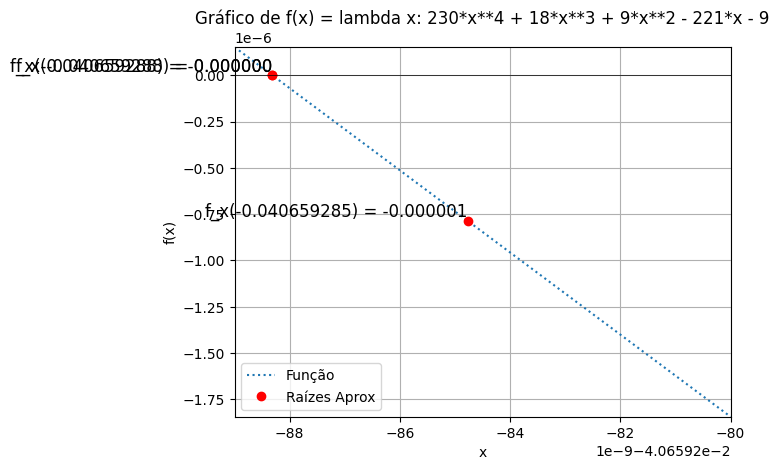

In [946]:
plot_function(funcao_exemplo_ex02,lambda_to_string, roots_ex02_1, -0.040659289, -0.04065928, nro_pts)

f(0.9623984187470688): -2.3142376903706463e-09
f(0.9623984191063186): 2.3709401375526795e-07


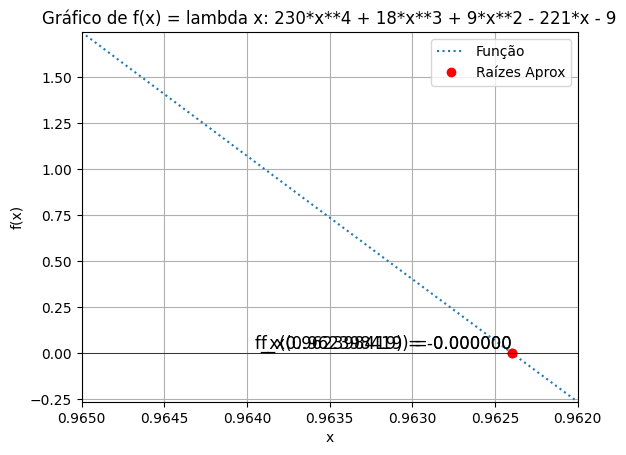

In [947]:
plot_function(funcao_exemplo_ex02,lambda_to_string, roots_ex02_2, 0.965, 0.962, nro_pts)

Podemos então perceber que as aproximações das raízes são: [-1,0] : `-0.04065928831575899`
 e [0,1] : `0.9623984187470688`


### Exercício 3
3) Uma gamela de comprimento L tem seção transversal semicircular com raio r
(veja a figura abaixo). Quando a gamela está cheia com água até uma distância
h do topo, o volume V de água é V = L [0,5πr2 - r2arcsen(h/r) - h(r2 – h2)1/2]


In [948]:
L = 10
V_desejado = 12.4
r = 1

a = 0
b = r
tol_ex03 = 0.01

vol = lambda h: L * ((0.5 * math.pi * r**2) - r**2* math.asin(h/r) - h * (r**2 - h**2)**(1/2))- V_desejado



Na análise geral sobre o exercício, compreendeu-se que o volume especificado corresponde ao volume da água na gamela = 12.4 pes. Dessa forma, para que possamos utilizar o método bissecção foi feita a função_volume [**vol()**] substraida por [**12.4 pes**]. Espera-se com o método seja encontrado a raiz, que representa a medição da água até o topo da gamela [**h**].


In [949]:
h_bis = bissecao_precisao (vol, a, b, tol_ex03)
print(f"A distancia da água até o topo da gamela é [h] bisseccao: {h_bis:.6f} pés.")

h_fp = falsaposicao_precisao (vol, a, b, tol_ex03, tol_ex03)
print(f"A distancia da água até o topo da gamela é [h] falsaposicao: {h_fp:.6f} pés.")

A distancia da água até o topo da gamela é [h] bisseccao: 0.164062 pés.
A distancia da água até o topo da gamela é [h] falsaposicao: 0.166638 pés.


Também inferiu-se que a questão pede a profundidade da água na gamela, portanto, de posse do valor de [h], pode-se encontrar a profundidade através de: profundidade = r - h

In [950]:
profundidade = r - h_bis
print(f"A profundidade da água na gamela é aproximadamente {profundidade:.6f} pés.")

A profundidade da água na gamela é aproximadamente 0.835938 pés.


### Exercício 4

4) Você está projetando um tanque esférico (veja a figura abaixo) para armazenar
água para uma pequena cidade num país.
O volume de líquido que ele pode armazenar pode ser calculado por
V =π h2 [3 R−h]
3
Onde V é o volume (m3), h é a profundidade de água no tanque (m) e R é o raio
do tanque (m). Se R = 3m, até qual profundidade o tanque deve ser enchido
para conter 30 m3? Use 3 iterações do Método do Newton-Raphson/Tangente
para obter a resposta.

In [951]:
r = 3
max_iter = 3

Entendeu-se que a altura máxima que [h] pode atingir é 2*raio = 2r = 6m.
Sendo assim, o intervalo de observação é [0,6] e como no exercício 2, podemos utilizar o ponto médio como a aproximação inicial para exercutar o newton_raphson()

In [952]:
a = 0
b = 6
x0 = (b-a)/2

In [953]:
# encontra o h quando v = 30
vol_menos_voldesejado = lambda h: math.pi * h**2*((3*r-h)/3)-30
derivada_ex04 = lambda h: math.pi * (2*r*h - h**2)

In [954]:
h_nr = newton_raphson_iterativo(vol_menos_voldesejado, derivada_ex04, x0, max_iter)
print(f"A altura [h] quando temos volume = 30 m cubicos:  {h_nr:.6f} m.")

A altura [h] quando temos volume = 30 m cubicos:  2.026906 m.


### Exercício 5
5) O Método de Newton-Raphson/Tangente pode não ser convergente. Verifique
que, para as funções e estimativas iniciais mostradas em (a) e (b), o método
não funciona.

a. f(x) = 1/10 + xe–x com x1 = 2
b. f(x) = x3 – x – 3 com x1 = -3

x*e⁻x

(xe⁻x)'

x'*e⁻x + e⁻x'*x

e⁻x + e⁻x*(-x)'*x

e⁻x - e⁻x*x

derivada = e⁻x(1-x)

In [955]:
funcao_ex05_a = lambda x: 1/10 + x * math.exp(-x)
derivada_ex05_a = lambda x:  (1-x) * math.exp(-x)

tol1 = 1e-2
x0 = 2
x1 = -3
funcao_ex05_b = lambda x: x**3 - x - 3
derivada_ex05_b = lambda x:  3*x**2 -1

In [956]:
# Testando a parte (a)
raiz_nr_ex05_a = newton_raphson_precisao(funcao_ex05_a, derivada_ex05_a, x0, tol1)
print(f"A raiz NR da função a encontrada é: {raiz_nr_ex05_a}")

# Testando a parte (b)
raiz_nr_ex05_b = newton_raphson_precisao(funcao_ex05_b, derivada_ex05_b, x0, tol1)
print(f"A raiz NR da função b encontrada é: {raiz_nr_ex05_b}")
print(f"euler : {math.exp(-2)}")

Derivada zero. Não é possível continuar.
A raiz NR da função a encontrada é: None
A raiz NR da função b encontrada é: 1.671702569747502
euler : 0.1353352832366127


O problema que estamos observando letra "a" é que o método de Newton-Raphson está divergindo, resultando em valores de x cada vez maiores até que a `derivada se aproxima de zero`, o que interrompe o processo. Isso demonstra um dos problemas e limitações do método de Newton-Raphson: ele pode não convergir para certas funções e estimativas iniciais.